<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed May 15 21:10:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.04              Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...    On  | 00000000:01:00.0  On |                  N/A |
|  0%   48C    P8              21W / 140W |   2739MiB /  6144MiB |     12%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch


# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

2.3.0
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# import torch
import torch
import torch.nn as nn

# import torchvision
import torchvision
from torchvision import datasets

import matplotlib.pyplot as plt

print(f"PyTorch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")



PyTorch Version: 2.3.0
Torchvision Version: 0.18.0


### 5.1. Getting a dataset


`torchvision.transforms.ToTensor` is a transform function in PyTorch's `torchvision` library. It converts a PIL Image or a numpy.ndarray with shape (H, W, C) in the range [0, 255] to a torch.FloatTensor of shape (C, H, W) in the range [0.0, 1.0]. 

This is often used as a part of preprocessing steps in computer vision tasks. It makes the image suitable for use with PyTorch models, as they expect the input in this format.

In [4]:
# setup training data

train_data = datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor(), target_transform=None)

test_data = datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor(), target_transform=None)

The discrepancy between the range of values in `image` and `train_data.data` is due to the transformation applied when loading the dataset.

When you load a dataset in PyTorch using a DataLoader, you can specify transformations to be applied to the data. One common transformation is `torchvision.transforms.ToTensor()`, which converts PIL Images or numpy arrays with a range of [0, 255] (standard for image data) to a PyTorch tensor with a range of [0, 1].

So, when you access an image from `train_data` directly, like `image, label = train_data[0]`, you're getting the transformed image data, which has been normalized to [0, 1]. 

On the other hand, `train_data.data` gives you the original, untransformed image data, which is why its values are in the range [0, 255].

In [5]:
image, label = train_data[0]
image.shape
train_data.targets[0]
train_data.data[0]
train_data.classes
train_data.data.shape
train_data[0][0]


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## 6. Visualize at least 5 different samples of the MNIST training dataset.

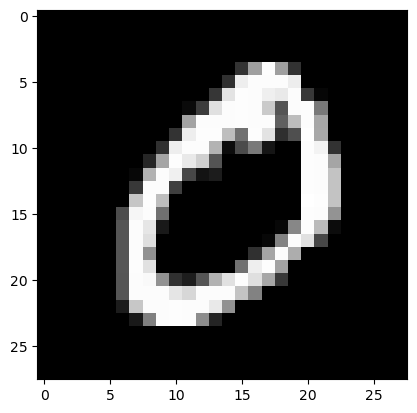

In [6]:

plt.imshow(train_data.data[1,:,:].squeeze(), cmap='gray')


Text(0.5, 1.0, 'Label: 5')

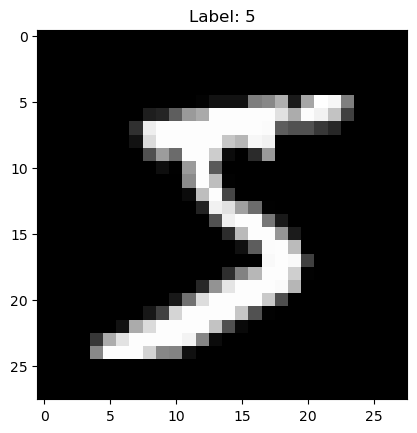

In [7]:
plt.imshow(train_data[0][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[0][1]}")

Text(0.5, 1.0, 'Label: 0')

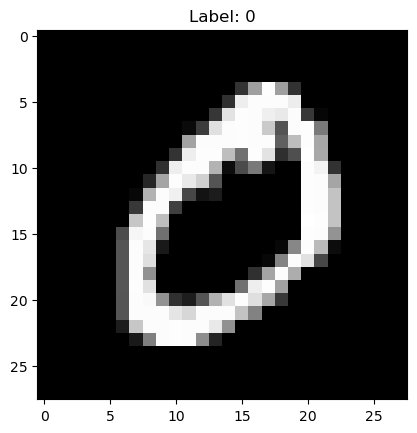

In [8]:
plt.imshow(train_data[1][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[1][1]}")

Text(0.5, 1.0, 'Label: 4')

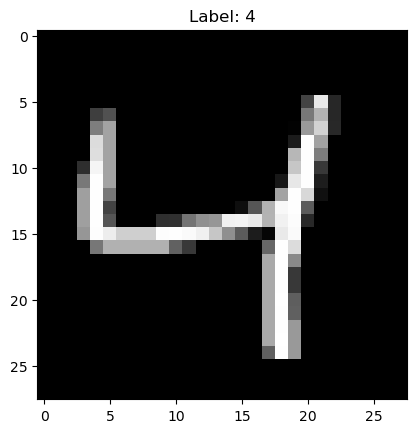

In [9]:
plt.imshow(train_data[2][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[2][1]}")

Text(0.5, 1.0, 'Label: 1')

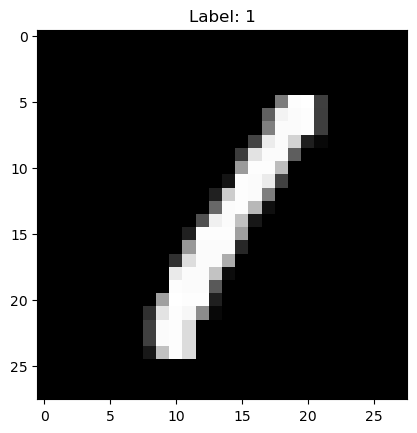

In [10]:
plt.imshow(train_data[3][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[3][1]}")

Text(0.5, 1.0, 'Label: 9')

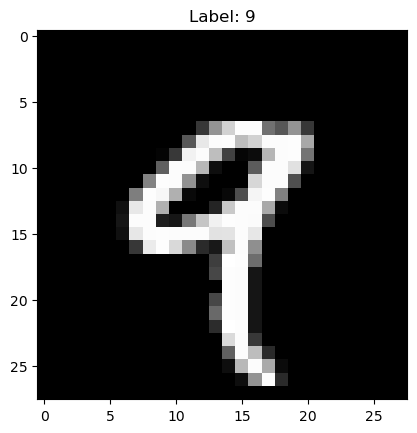

In [11]:
plt.imshow(train_data[4][0].squeeze(), cmap="gray")
plt.title(f"Label: {train_data[4][1]}")

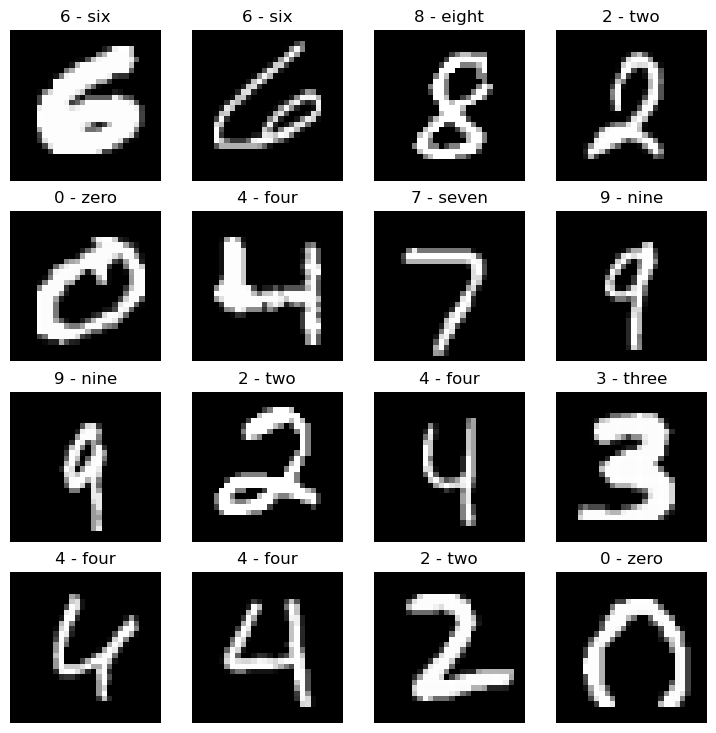

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
class_names = train_data.classes
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader

# Create data loaders
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Dataloaders: {train_dataloader}, {test_dataloader}")




Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7f3efe19bd90>, <torch.utils.data.dataloader.DataLoader object at 0x7f3efe225e10>


In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [15]:
train_dataloader.dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [16]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

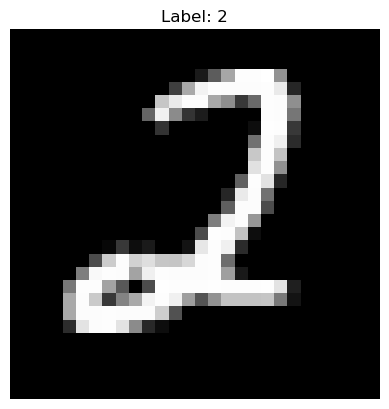

In [17]:
# Read out one data from train_dataloader

# torch.random.manual_seed(43)

random_idx = torch.randint(0, len(train_dataloader), size=[1]).item()
train_features_batch, train_labels_batch = train_dataloader.dataset[random_idx]
plt.imshow(train_features_batch.squeeze(), cmap="gray")
plt.title(f"Label: {train_labels_batch}")
plt.axis(False)


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

### 8.1 Create a linear model

In [18]:
from torch import nn
from torch.nn import functional as F

class Model0(nn.Module):
    def __init__(self, input_features=28 * 28, hidden_size=512, num_classes=10):
        super(Model0, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_features, hidden_size),
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    

In [19]:
model_0 = Model0()
model_0.to(device)



Model0(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [20]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    )
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [21]:
# Import accuracy metric
from helper_functions import (
    accuracy_fn,
)  # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = (
    nn.CrossEntropyLoss()
)  # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [22]:
from timeit import default_timer as timer


def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [23]:
torch.manual_seed(42)

start_CPU = timer()

epoches = 3
model_0.to('cpu')

for epoch in range(epoches):
    print(f"Epoch {epoch + 1}/{epoches}")
    for batch_idx, (data, targets) in enumerate(train_dataloader):
        data = data.to(device='cpu')
        targets = targets.to(device='cpu')

        # forward pass
        scores = model_0(data)
        loss = loss_fn(scores, targets)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        if batch_idx % 200 == 0:
            print(f"Batch {batch_idx}/{len(train_dataloader)}")
            print(f"Loss: {loss}")

    model_0.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in test_dataloader:
            data = data.to(device='cpu')
            targets = targets.to(device='cpu')

            scores = model_0(data)
            _, predictions = scores.max(1)
            correct += (predictions == targets).sum()
            total += targets.size(0)

        print(f"Accuracy: {correct/total}")

end_CPU = timer()        
total_train_time_model_0_CPU = print_train_time(start_CPU, end_CPU, device='CPU')

Epoch 1/3
Batch 0/1875
Loss: 2.294743537902832
Batch 200/1875
Loss: 0.6560382843017578
Batch 400/1875
Loss: 0.17976708710193634
Batch 600/1875
Loss: 0.11613836139440536
Batch 800/1875
Loss: 0.35504859685897827
Batch 1000/1875
Loss: 0.3562397062778473
Batch 1200/1875
Loss: 0.4147305488586426
Batch 1400/1875
Loss: 0.44966310262680054
Batch 1600/1875
Loss: 0.09736356884241104
Batch 1800/1875
Loss: 0.24281814694404602
Accuracy: 0.9162999987602234
Epoch 2/3
Batch 0/1875
Loss: 0.0899810716509819
Batch 200/1875
Loss: 0.5254319906234741
Batch 400/1875
Loss: 0.47262877225875854
Batch 600/1875
Loss: 0.3364008069038391
Batch 800/1875
Loss: 0.6422867178916931
Batch 1000/1875
Loss: 0.36013951897621155
Batch 1200/1875
Loss: 0.695023238658905
Batch 1400/1875
Loss: 0.23207685351371765
Batch 1600/1875
Loss: 0.3670985698699951
Batch 1800/1875
Loss: 0.3110123872756958
Accuracy: 0.91839998960495
Epoch 3/3
Batch 0/1875
Loss: 0.26853278279304504
Batch 200/1875
Loss: 0.20994055271148682
Batch 400/1875
Loss: 

In [24]:
torch.manual_seed(42)

start_CPU = timer()

epoches = 3
model_0.to(device)

for epoch in range(epoches):
    print(f"Epoch {epoch + 1}/{epoches}")
    for batch_idx, (data, targets) in enumerate(train_dataloader):
        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        scores = model_0(data)
        loss = loss_fn(scores, targets)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        if batch_idx % 200 == 0:
            print(f"Batch {batch_idx}/{len(train_dataloader)}")
            print(f"Loss: {loss}")

    model_0.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in test_dataloader:
            data = data.to(device)
            targets = targets.to(device)

            scores = model_0(data)
            _, predictions = scores.max(1)
            correct += (predictions == targets).sum()
            total += targets.size(0)

        print(f"Accuracy: {correct/total}")

end_CPU = timer()
total_train_time_model_0_CPU = print_train_time(start_CPU, end_CPU, device="CPU")

Epoch 1/3
Batch 0/1875
Loss: 0.14165686070919037
Batch 200/1875
Loss: 0.5584613680839539
Batch 400/1875
Loss: 0.12381197512149811
Batch 600/1875
Loss: 0.11799247562885284
Batch 800/1875
Loss: 0.35327500104904175
Batch 1000/1875
Loss: 0.25273779034614563
Batch 1200/1875
Loss: 0.2964065968990326
Batch 1400/1875
Loss: 0.36436232924461365
Batch 1600/1875
Loss: 0.08355993032455444
Batch 1800/1875
Loss: 0.24812263250350952
Accuracy: 0.9194999933242798
Epoch 2/3
Batch 0/1875
Loss: 0.08402856439352036
Batch 200/1875
Loss: 0.5255832672119141
Batch 400/1875
Loss: 0.4333699941635132
Batch 600/1875
Loss: 0.3586880564689636
Batch 800/1875
Loss: 0.6199684739112854
Batch 1000/1875
Loss: 0.32439589500427246
Batch 1200/1875
Loss: 0.6179890036582947
Batch 1400/1875
Loss: 0.21034450829029083
Batch 1600/1875
Loss: 0.35543835163116455
Batch 1800/1875
Loss: 0.2977149486541748
Accuracy: 0.92249995470047
Epoch 3/3
Batch 0/1875
Loss: 0.2326902449131012
Batch 200/1875
Loss: 0.19772140681743622
Batch 400/1875
Lo

In [25]:
torch.manual_seed(42)

model_0.to(device)
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(
                y_true=y, y_pred=y_pred.argmax(dim=1)
            )  # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,  # only works when model was created with a class
        "model_loss": loss.item(),
        "model_acc": acc,
    }


# Calculate model 0 results on test dataset
model_0_results = eval_model(
    model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'Model0',
 'model_loss': 0.2804030478000641,
 'model_acc': 92.06269968051119}

### 8.2 ReLU model

In [26]:
class Model1(nn.Module):
    def __init__(self, input_features=28 * 28, hidden_size=512, num_classes=10):
        super(Model1, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_features, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    



In [27]:
model_1 = Model1().to(device)
model_1.parameters().__next__().device


device(type='cuda', index=0)

In [28]:
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
loss_fn_1 = nn.CrossEntropyLoss()



In [29]:
torch.manual_seed(42)

start_model_1 = timer()

for epoch in range(epoches):
    for batch_idx, (data, target) in enumerate(train_dataloader):
        data = data.to(device)
        target = target.to(device)

        # forward pass
        scores = model_1(data)
        loss = loss_fn_1(scores, target)

        # backward pass
        optimizer_1.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer_1.step()

        if batch_idx % 200 == 0:
            print(f"Epoch {epoch + 1}/{epoches}, Batch {batch_idx}/{len(train_dataloader)}")
            print(f"Loss: {loss}")
    
    model_1.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, target in test_dataloader:
            data = data.to(device)
            target = target.to(device)

            scores = model_1(data)
            _, predictions = scores.max(1)
            correct += (predictions == target).sum()
            total += target.size(0)

        print(f"Accuracy: {correct/total}")

Epoch 1/3, Batch 0/1875
Loss: 2.300072431564331
Epoch 1/3, Batch 200/1875
Loss: 0.6868864297866821
Epoch 1/3, Batch 400/1875
Loss: 0.17474265396595
Epoch 1/3, Batch 600/1875
Loss: 0.08643194288015366
Epoch 1/3, Batch 800/1875
Loss: 0.22306132316589355
Epoch 1/3, Batch 1000/1875
Loss: 0.2910189926624298
Epoch 1/3, Batch 1200/1875
Loss: 0.1801408976316452
Epoch 1/3, Batch 1400/1875
Loss: 0.20129479467868805
Epoch 1/3, Batch 1600/1875
Loss: 0.08322212100028992
Epoch 1/3, Batch 1800/1875
Loss: 0.10113171488046646
Accuracy: 0.9578999876976013
Epoch 2/3, Batch 0/1875
Loss: 0.05877064913511276
Epoch 2/3, Batch 200/1875
Loss: 0.226815864443779
Epoch 2/3, Batch 400/1875
Loss: 0.03887078911066055
Epoch 2/3, Batch 600/1875
Loss: 0.20990192890167236
Epoch 2/3, Batch 800/1875
Loss: 0.08811917901039124
Epoch 2/3, Batch 1000/1875
Loss: 0.16590149700641632
Epoch 2/3, Batch 1200/1875
Loss: 0.1740764081478119
Epoch 2/3, Batch 1400/1875
Loss: 0.057400837540626526
Epoch 2/3, Batch 1600/1875
Loss: 0.207517

### 8.3 CNN

In [51]:
class Model2(nn.Module):
    def __init__(self, input_features = 1, hidden_size=512, num_classes=10):
        super(Model2, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_features,
                out_channels=hidden_size,
                kernel_size=3,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_size,
                out_channels=hidden_size,
                kernel_size=3,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_size,
                out_channels=hidden_size,
                kernel_size=3,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_size * 7 * 7, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        logits = self.classifier(x)
        return logits


torch.manual_seed(42)
model_2 = Model2().to(device)
model_2

Model2(
  (block1): Sequential(
    (0): Conv2d(1, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=25088, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [31]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,  # how big is the square that's going over the image?
                stride=1,  # default
                padding=1,
            ),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2, stride=2
            ),  # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1, hidden_units=10, output_shape=len(class_names)
).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

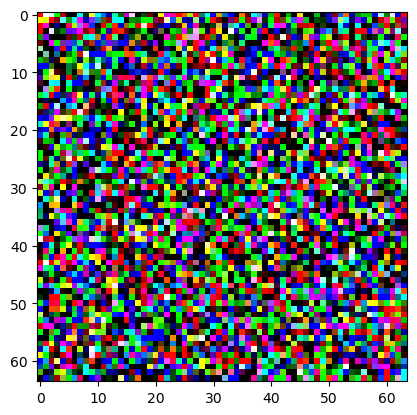

In [32]:
torch.manual_seed(42)
import numpy as np
import matplotlib.pyplot as plt

# Create sample batch of random numbers with same size as image batch
images = torch.randn(
    size=(32, 3, 64, 64)
)  # [batch_size, color_channels, height, width]
test_image = images[0]  # get a single image for testing
print(
    f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]"
)
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

test_image.shape

test_image_np = test_image.numpy()

test_image_np.shape


plt.imshow(test_image_np.transpose(1, 2, 0))

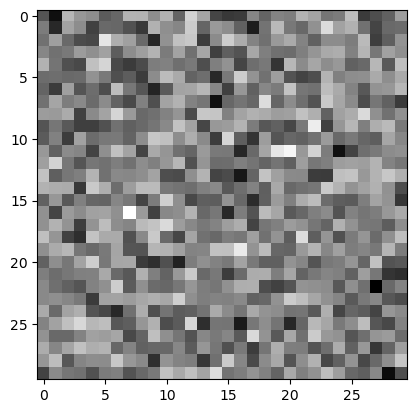

In [33]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(
    in_channels=3, out_channels=10, kernel_size=(5,5), stride=2, padding=0
)  # also try using "valid" or "same" here

# Pass the data through the convolutional layer
image2 = conv_layer(
    test_image
) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)


image2_np = image2.detach().numpy()

image2_np.shape

plt.imshow(image2_np[0], cmap="gray")

In [34]:
# Get shapes of weight and bias tensors within conv_layer_2
print(
    f"conv_layer weight shape: \n{conv_layer.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]"
)
print(f"\nconv_layer bias shape: \n{conv_layer.bias.shape} -> [out_channels=10]")

conv_layer weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer bias shape: 
torch.Size([10]) -> [out_channels=10]


In [35]:
model_2 = Model2()
model_2.to(device)


Model2(
  (block1): Sequential(
    (0): Conv2d(784, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [55]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.1)



In [56]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
model_2 = Net().to(device)
model_2


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [61]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()        
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output    # return x for visualization

model_2 = CNN().to(device)


In [62]:
start_model_2 = timer()

epoches = 3

model_2.train()

for epoch in range(epoches):
    print(f"Epoch {epoch + 1}/{epoches}")
    for batch_idx, (data, target) in enumerate(train_dataloader):
        data = data.to(device)
        target = target.to(device)

        # forward pass
        scores = model_2(data)
        loss = loss_fn(scores, target)

        # backward pass
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        if batch_idx % 200 == 0:
            print(f"Epoch {epoch + 1}/{epoches}, Batch {batch_idx}/{len(train_dataloader)}")
            print(f"Loss: {loss}")
    
    model_2.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data, target in test_dataloader:
            data = data.to(device)
            target = target.to(device)

            scores = model_2(data)
            _, predictions = scores.max(1)
            correct += (predictions == target).sum()
            total += target.size(0)

        print(f"Accuracy: {correct/total}")
        
end_model_2 = timer()
print(f"Total training time: {end_model_2 - start_model_2:.3f} seconds")

Epoch 1/3
Epoch 1/3, Batch 0/1875
Loss: 2.3115296363830566
Epoch 1/3, Batch 200/1875
Loss: 2.3294100761413574
Epoch 1/3, Batch 400/1875
Loss: 2.2970118522644043
Epoch 1/3, Batch 600/1875
Loss: 2.3244104385375977
Epoch 1/3, Batch 800/1875
Loss: 2.289072275161743
Epoch 1/3, Batch 1000/1875
Loss: 2.3247358798980713
Epoch 1/3, Batch 1200/1875
Loss: 2.2944021224975586
Epoch 1/3, Batch 1400/1875
Loss: 2.303274631500244
Epoch 1/3, Batch 1600/1875
Loss: 2.2689194679260254
Epoch 1/3, Batch 1800/1875
Loss: 2.3087031841278076


/home/gs/anaconda3/envs/zhawenv/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/conda-bld/pytorch_1712608853085/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Accuracy: 0.12680000066757202
Epoch 2/3
Epoch 2/3, Batch 0/1875
Loss: 2.321911573410034
Epoch 2/3, Batch 200/1875
Loss: 2.3179376125335693
Epoch 2/3, Batch 400/1875
Loss: 2.3132565021514893
Epoch 2/3, Batch 600/1875
Loss: 2.3151841163635254
Epoch 2/3, Batch 800/1875
Loss: 2.31150484085083
Epoch 2/3, Batch 1000/1875
Loss: 2.305237293243408
Epoch 2/3, Batch 1200/1875
Loss: 2.289778709411621
Epoch 2/3, Batch 1400/1875
Loss: 2.2971856594085693
Epoch 2/3, Batch 1600/1875
Loss: 2.267001152038574
Epoch 2/3, Batch 1800/1875
Loss: 2.2941370010375977
Accuracy: 0.12680000066757202
Epoch 3/3
Epoch 3/3, Batch 0/1875
Loss: 2.298250913619995
Epoch 3/3, Batch 200/1875
Loss: 2.292942762374878
Epoch 3/3, Batch 400/1875
Loss: 2.2914514541625977
Epoch 3/3, Batch 600/1875
Loss: 2.2931599617004395
Epoch 3/3, Batch 800/1875
Loss: 2.282531976699829
Epoch 3/3, Batch 1000/1875
Loss: 2.301159620285034
Epoch 3/3, Batch 1200/1875
Loss: 2.280390977859497
Epoch 3/3, Batch 1400/1875
Loss: 2.2843687534332275
Epoch 3/3

In [39]:
data.shape

torch.Size([32, 1, 28, 28])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?